<a href="https://colab.research.google.com/github/alousada/The-Capstone-Project/blob/main/Week%203%20-%20(1)%20first%20part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p>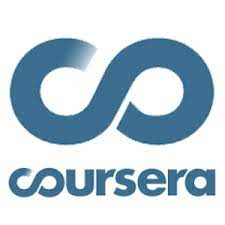</p>

<h1>Segmenting and Clustering Neighborhoods on Toronto</h1>
<h2>Part III : Segmenting and Clustering</h2>

This script will retrieve the coordinates from the processed file (orignial source Wikipedia). 

The main requisite : 

-  explore, segment, and group neighborhoods into clusters to find similar neighborhoods in Toronto City.



# Install Libraries

In [16]:
!pip install beautifulsoup4

In [17]:
!pip install lxml

In [18]:
!pip install geopy 

In [19]:
!pip install folium


# Import Libraries


In [20]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported.')

Libraries imported.


# Load the Data

In [21]:
df4 = pd.read_csv('toronto_postalcode_coordinates.csv')
df4.head()


,Unnamed: 0,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,0,M3A,North York,Parkwoods,43.753259,-79.329656
1,1,M4A,North York,Victoria Village,43.725882,-79.315572
2,2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


# Selecting Toronto Data



In [22]:
df5 = df4[df4['Borough'].str.contains('Toronto',regex=False)]

In [23]:
df5

,Unnamed: 0,PostalCode,Borough,Neighborhood,Latitude,Longitude
2,2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
9,9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259
35,35,M4J,East York/East Toronto,The Danforth East,43.685347,-79.338106


# Visualizing the Data with Folium on Map

In [24]:
map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,borough,neighbourhood in zip(df5['Latitude'],df5['Longitude'],df5['Borough'],df5['Neighborhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)

In [25]:
map_toronto

# Applying kmeans model

In [27]:
k=6
toronto_clust = df5.drop(['PostalCode','Borough','Neighborhood'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(toronto_clust)
kmeans.labels_
df5.insert(0, 'ClusterLabels', kmeans.labels_)

In [28]:
df5

,ClusterLabels,Unnamed: 0,PostalCode,Borough,Neighborhood,Latitude,Longitude
2,2,2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
9,2,9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,2,15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,2,19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,2,20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,3,24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,3,25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,3,30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,3,31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259
35,3,35,M4J,East York/East Toronto,The Danforth East,43.685347,-79.338106


# Visualizing the clusters on the Map with Folium

In [35]:
# create map
map_clusters = folium.Map(location=[43.651070,-79.347015],zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(df5['Latitude'], df5['Longitude'], df5['Neighborhood'], df5['ClusterLabels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [36]:
map_clusters